# **Метод ветвей и границ**

Задачи дискретной оптимизации имеют конечное множество допустимых решений, которые теоретически можно перебрать и выбрать наилучшее (дающее минимум или максимум целевой функции). Практически же зачастую это бывает неосуществимо даже для задач небольшой размерности.


В методах неявного перебора делается попытка так организовать перебор, используя свойства рассматриваемой задачи, чтобы отбросить часть
допустимых решений. Наибольшее распространение среди схем неявного
перебора получил **метод ветвей и границ**, в основе которого лежит идея
последовательного разбиения множества допустимых решений. 

На каждом шаге метода элементы разбиения (подмножества) подвергаются анализу – содержит ли данное подмножество оптимальное решение или нет. Если рассматривается задача на минимум, то проверка осуществляется путем
сравнения нижней оценки значения целевой функции на данном подмножестве с верхней оценкой функционала. В качестве оценки сверху используется значение целевой функции на некотором допустимом решении.


Допустимое решение, дающее наименьшую верхнюю оценку, называют
рекордом. Если оценка снизу целевой функции на данном подмножестве
не меньше оценки сверху, то рассматриваемое подмножество не содержит
решения лучше рекорда и может быть отброшено. Если значение целевой
функции на очередном решении меньше рекордного, то происходит смена
рекорда. 

Будем говорить, что подмножество решений просмотрено, если
установлено, что оно не содержит решения лучше рекорда.
Если просмотрены все элементы разбиения, алгоритм завершает работу, а текущий рекорд является оптимальным решением.

В противном случае среди непросмотренных элементов разбиения выбирается множество,
являющееся в определенном смысле перспективным. Оно подвергается
разбиению (ветвлению). Новые подмножества анализируются по описанной выше схеме. Процесс продолжается до тех пор, пока не будут просмотрены все элементы разбиения. 

То есть весь метод это сочетание двух операций:
 

*   Ветвление.
*   Оценка верхней/нижней границы и «отсечение»
неперспективной ветви.



Пример. Отличие полного перебора от метода ветвей и границ.

Допустим у нас есть пустой рюкзак грузоподьёмностью (5кг) и нам надо положить: ноутбук (2кг), спальник (3кг), молот (5кг).

Тогда дерево полного перебора:

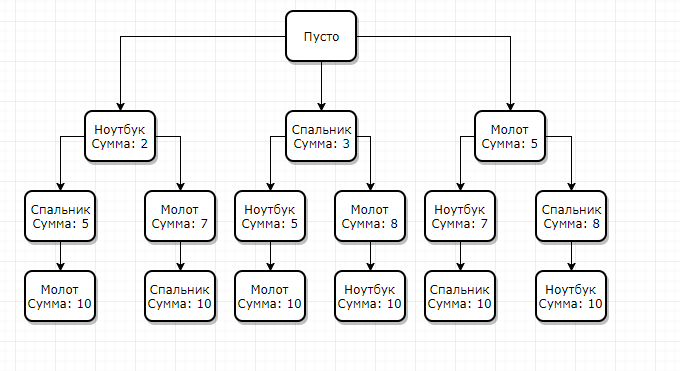

В этом дереве мы можем заметить, что у нас есть узлы, которые превышают вес рюкзака и при этом у них есть ещё и потомки, а зачем нам продолжать рассматривать следующие варианты, если дальше будет только хуже? Поэтому мы ограничиваем весом 5 и получаем такой граф:

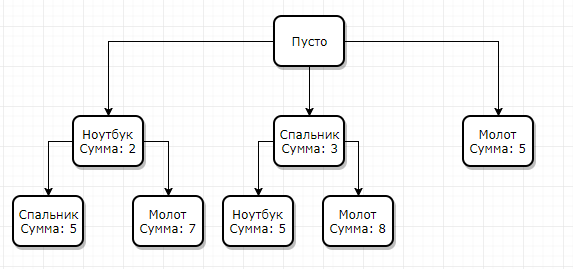

Формальное описание:

Пусть решается задача оптимизации:

$$\phi(x) \rightarrow min$$
$$x ∈ Ω.$$

Оценкой снизу функции $\phi$ на подмножествах множества $\Omega$ называется функция $\psi: 2^\Omega \rightarrow R$, для которой:

$$\psi(A) <= min_{x \in A}\phi(x), \space для \space А \subset \Omega$$


Рассмотрим разбиение множества $\Omega$ на k непустых подмножеств:
$$\Omega = \Omega_1 \cup \Omega_2 \cup ... \Omega_k,$$
$$\Omega_i \neq \emptyset, i =1, ..., k,$$
$$\Omega_i \cap \Omega_j = \emptyset, i \neq j,$$

Предположим, что известно некоторое допустимое решение $x_0$, выбранное случайно или полученное каким либо методом. Примем начальное рекордное решение $x_{rec}$ равным $x_0$.

Введем два семейства подмножест: A и B. В семейства A включим те подмножества $\Omega_i$ разбиения, для которых оценка $\psi(\Omega_i) < \phi(x_{rex})$. Остальные поместим в семейство B. Таким образом, разбиение множества $\Omega$ состоит из двух непересекающихся частей A и B.

Заметим, что подмножества семейства B не могут содержать оптимального решения задачи.



Опишем основну итерацию алгоритма.
Выберем и удалим из семейства A подмножества $\Omega_s$ с минимальный оценкой. 

Если возможно быстро найти минимум функции $\phi(x)$ на подмножестве $\Omega_s$, то сделаем это. Пусть $x_s$ - полученное решение. Если $\phi(x_s) < \psi(x_{rec})$, то запомним новый рекорд: $x_{rec} = x_s$.

Если задача поиска минимума на множестве $\Omega_s$ вычислительно трудна, то построим разбиение $\Omega_s$ на l подмножеств:

$$\Omega_s = \Omega_{s1} \cup \Omega_{s2} \cup ... \Omega_{sl},$$

Подмножества этого разбияния с оценкой, не меньшей чем $\phi(x_{rec})$, поместим в семейство B. Остальными подмножествами заменим подмножество $\Omega_s$, в семействе А.

Если семейство A непустое, то выполняем основную итерацию еще раз.




Это весьма общая схема и требует уточнения. Необходимо:

1. Выбрать способ оценивая подмножеств. С одной стороны, оценка должна быть как можно ближе к минимуму функции на подмножестве, с другой - легко вычисляться

2. Определить способ разбиений множеств на подмножества.

3. Уточнить порядок выбора очередного подмножества для ветвления. Он может отличаться от предложенного выше. Например, можно выбирать из подмножеств, полученных на последнем шаге, подмножество с лучшей оценкой (а не из всех).

Пример. Решение задачи

На приобретение оборудования для нового производственного участка выделено 80 ден. ед. Оборудование должно быть размещено на площади $5200 \space м^2$. Предприятие может заказать машины А, стоимостью 8 ден. ед. , занимающие площадь $208 \space м^2$ и выпускающие 10 ед.  продукции за смену, и машины Б стоимостью 5 ден. ед. , занимающие площадь $505 \space м^2$ и обеспечивающие выпуск 13 ед. продукции за смену. При этом следует учесть, что машин типа А можно заказать не более 7 штук.

Необходимо:

* составить экономико-математическую модель, пользуясь которой, можно найти план приобретения машин, учитывающий возможности предприятия и обеспечивающий наивысшую производительность нового участка;
* пользуясь одним из методов целочисленного линейного программирования, найти оптимальный план приобретения оборудования.

Решение:

Через $x_1$ и $x_2$ обозначим количество приобретаемого оборудования вида  и  соответственно.

Целевая функция, выражающая количество выпускаемых изделий:

$f = 10x_1 + 13x_2$

Ограничения по деньгам и площади:

$8x_1+5x_2 <= 80$

$208x_1+505x_2 <= 5200$

$x_1 <= 7$

Количество приобретаемых тракторов не может быть отрицательным числом: $x_1, x_2 >= 0$.



Целевая функция будет иметь следующий вид:

$f = 10x_1 + 13x_2 \rightarrow max$

$\left\{ \begin{matrix}
8x_1+5x_2 <= 80 \\
208x_1+505x_2 <= 5200 \\
x_1 <= 7
\end{matrix} \right.$

$x_1 >=0, x_2 >=0$

$x_1, x_2$ - целые. 
Решим полученную задачу симплексным или графическим методом с отброшенным условием целочисленности. Получаем:

$x_1 = 4.8 , x_2 = 8.32,  f_{max} = 156.16 $

Ответ получился нецелым, поэтому решим задачу линейного программирования методом ветвей и границ.

Обе переменные имеют нецелые значения. Выбор переменной $x_2$  порождает две подзадачи:


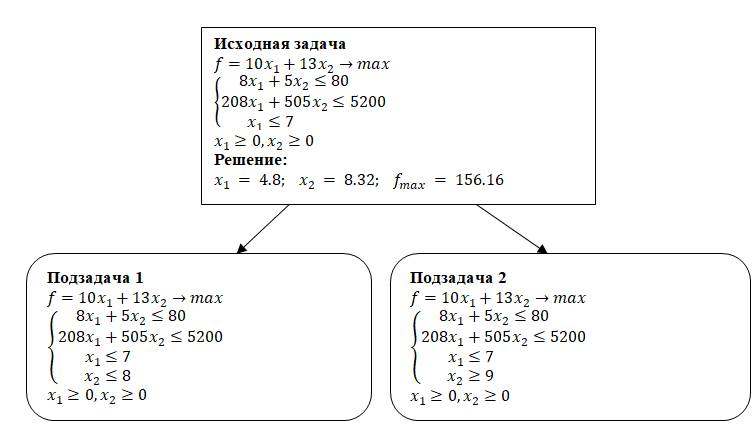

Найдем оптимальный план 1-й подзадачи c дополнительным ограничением. Решение задачи симплекс-методом:

$x_1 = 5 , x_2 = 8,  f_{max} = 154 $

Получили целочисленный ответ – исходная задача целочисленного программирования решена.

Следует закупать 5 штук оборудования типа  и 8 штук оборудования типа . При этом производительность нового участка равна 154 изделия за смену.



1. [Решение задачи комивояжера](https://kvckr.github.io/DM/DM28.html)
2. [Библиотека pywraplp](http://google.github.io/or-tools/python/ortools/linear_solver/pywraplp.html)

Практическое задание

Для выполнения работ $P_1, P_2, P_3$ сельскохозяйственное предприятие может приобрести тракторы марок А и B стоимостью соответственно $c_1$ и $c_2$ ден. ед.  каждый. С использованием новой техники необходимо выполнить не менее $b_1$ условных единиц работы $P_1$, не менее $b_2$ условных единиц работы $P_2$ и не менее  $b_3$ условных единиц работы $P_3$. За рассматриваемый промежуток времени с использованием трактора марки A можно выполнить $a_{11}$ условных единиц работы $P_1$, $a_{21}$ условных единиц работы $P_2$ или $a_{31}$ условных единиц работы $P_3$; с использованием трактора марки Б – $a_{12}$ условных единиц работы $P_1$, $a_{22}$ условных единиц работы $P_2$ или $a_{23}$ условных единиц работы $P_3$. 

Требуется:

Составить экономико-математическую модель, позволяющую найти такой вариант приобретения тракторов той или другой марки, при котором будут выполнены все необходимые работы, а затраты на новую технику будут минимальны;
Пользуясь методом ветвей и границ, найти оптимальный вариант приобретения тракторов.

$
b_1 = 20, b_2 = 190, b_3 = 88, a_{11} = 4, a_{21} = 19, a_{31}=4, a_{12} = 1, a_{22} = 15, a_{32} = 15, c_1= 3, c_2 = 5$